# Analisis exploratorio

En este trabajo se realiza un análisis exploratorio de un conjunto de datos con 17 variables que varian entre continuas y categóricas.

In [1]:
# Importa las librerias adecuadas
import numpy as np
import pandas as pd
import csv
from datetime import datetime, date
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
df_cartera = pd.read_csv("cartera.txt", sep="|")
#df_cartera.to_csv("cartera.csv",index=False)
df_cartera.head()

,PRODUCTO,ID_CLIENTE,CONTRATO,PLAZO,Periodicidad,Comisiones,RENTA,RENTAS,Valor Residual,MONTO_INICIAL_ACTIVO_S_IVA,TABLA AMOTIZACIÓN,FECHA INICIO,FECHA_DE_TERMINACION,Reestructurado,Tipo de Reestrucutra,Region,Moneda
1,Arrendamiento,104,4321,31,Mensual,10501.226427,7461.835424,9992864.88,85634.482759,1.235464e+07,Tabla Amort,2015-01-01 00:00:00,2018-01-01,No,NaN,CDMX,MXN
2,Arrendamiento,104,4322,41,Mensual,17028.684041,6790.550000,12636154.08,81875.000000,1.474803e+07,Tabla Amort,2015-01-01 00:00:00,2018-01-01,No,NaN,CDMX,MXN
3,Arrendamiento,104,4323,33,Mensual,12479.856658,10489.488623,10786315.32,86831.896552,1.279741e+07,Tabla Amort,2015-01-01 00:00:00,2018-01-01,No,NaN,CDMX,MXN
4,Arrendamiento,104,4324,32,Mensual,6600.219848,6296.245401,6316047.36,52434.267241,7.215508e+06,Tabla Amort,2015-01-01 00:00:00,2018-01-01,No,NaN,CDMX,MXN
5,Arrendamiento,104,4333,29,Mensual,9004.495129,5915.501186,5723917.92,52434.267241,5.987673e+06,Tabla Amort,2015-01-01 00:00:00,2018-01-01,No,NaN,CDMX,MXN


## Observaciones

Las variables **periodicidad**, **tabla amortizacion** y **contrato** no nos brindan informacion ya que las primeras dos son variables que son iguales para todos los datos y la tercera es una variable categórica que es diferentes para cada dato por lo que sirve mas como un identificador de la operación. Por estas razones, no es necesario tomar en cuenta las variables mencionadas para el analisis exploratorio.

In [3]:
cuentas_period = df_cartera['Periodicidad'].value_counts()
porcen = cuentas_period*100/df_cartera.shape[0]
print(f'El {porcen[0]:0.0f} % de los datos tiene la periodicidad '+ df_cartera['Periodicidad'][1])

El 100 % de los datos tiene la periodicidad Mensual


In [4]:
cuentas_tabla = df_cartera['TABLA AMOTIZACIÓN'].value_counts()
porcen = cuentas_tabla*100/df_cartera.shape[0]
print(f'El {porcen[0]:0.0f} % de los datos tiene la Tabla Amotización como:'+ df_cartera['TABLA AMOTIZACIÓN'][1])

El 100 % de los datos tiene la Tabla Amotización como:Tabla Amort


Prácticamente todos los contratos reestructurados son por 'Prog COVID' por lo que la variable **tipo de reestructura** se puede eliminar del análisis.

In [5]:
cuentas_rest = df_cartera['Reestructurado'].value_counts()
cuentas_rest_tipo = df_cartera['Tipo de Reestrucutra'].value_counts()

print('El numero de contratos reestructurados es ' + str(cuentas_rest[1]) +
      ' y el número de contratos reestructurados por ' + cuentas_rest_tipo.index[0] + ' es ' + str(cuentas_rest_tipo[0]))

El numero de contratos reestructurados es 153 y el número de contratos reestructurados por Prog COVID es 152


### Numero de contratos por producto

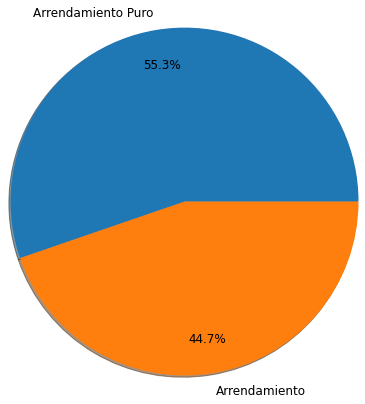

In [6]:
# Separa por regiones
cuentas_prod = df_cartera['PRODUCTO'].value_counts()

# figura
plt.pie(cuentas_prod, labels=cuentas_prod.index, radius=2.0, 
        autopct='%0.1f%%',shadow=True, textprops={'fontsize': 12},pctdistance=0.8)
plt.axis=('equal')

Los productos tienen casi la misma distribucion, con un poco mas de arrendamiento puro con el 55\%

### Numeros de contratos por regiones

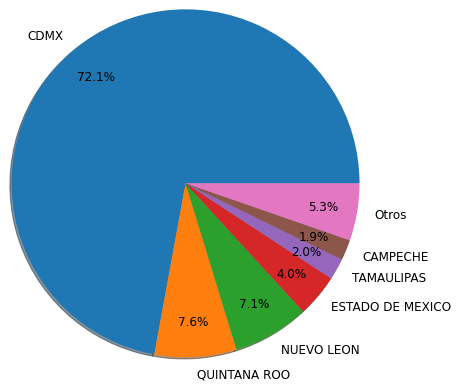

In [7]:
# Separa por regiones
cuentas_reg = df_cartera['Region'].value_counts()

# Total de datos
suma_cuentas = sum(cuentas_reg)

# Se realiza un data frame donde esten las regiones en las que haya mas de un 1.5% de las transacciones
porcentaje_reg = cuentas_reg[cuentas_reg>suma_cuentas*0.015]*100/suma_cuentas
porc_reg = porcentaje_reg.append(pd.Series([sum(cuentas_reg[cuentas_reg<suma_cuentas*0.015])*100/suma_cuentas],index=['Otros']))

# Figura
plt.pie(porc_reg, labels=porc_reg.index, radius=2.0, 
        autopct='%0.1f%%',shadow=True, textprops={'fontsize': 12},pctdistance=0.8)
plt.axis=('equal')

Prácticamente 3 de cada 4 contratos se realizan en la ciudad de México. 

Si el propósito es expandirse a todo Mexico, se puede realizar un análisis posterior para ver cuales son las areas de oportunidad para expendirse al resto de la república.

Si no existe un propósito de expansión, se puede explorar más a detalle cuales son las condiciones de los contratos en la CDMX ya que abarcan una gran mayoría de los contratos. 

### Numeros de contratos por cliente

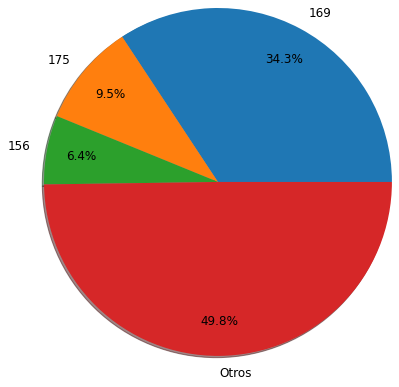

In [8]:
cuentas_cliente = df_cartera['ID_CLIENTE'].value_counts()

# Total de datos
suma_cuentas = sum(cuentas_cliente)

# Se realiza un data frame donde esten las regiones en las que haya mas de un 2% de las transacciones
porcentaje_cliente = cuentas_cliente[cuentas_cliente>suma_cuentas*0.02]*100/suma_cuentas
porc_cliente = porcentaje_cliente.append(pd.Series(
    [sum(cuentas_cliente[cuentas_cliente<suma_cuentas*0.02])*100/suma_cuentas],index=['Otros']))

# Figura
plt.pie(porc_cliente, labels=porc_cliente.index, radius=2.0, 
        autopct='%0.1f%%',shadow=True, textprops={'fontsize': 12},pctdistance=0.8)
plt.axis=('equal')

In [9]:
print('Total de clientes: ' + str(cuentas_cliente.shape[0]))

Total de clientes: 383


Se tienen un total de 383 clientes. Sin embargo, solo entre tres clientes se distribuye el 50\% de los contratos. Se debe prestar atencion especial a estos clientes al tomar en cuenta las decisiones que se tomen. Esto tampoco quiere decir que se decuiden a los clientes con menos contratos o los nuevos, pero es importante saber como piensan los clientes que realizan la mayoria de las operaciones.

### Numeros de contrato por divisa

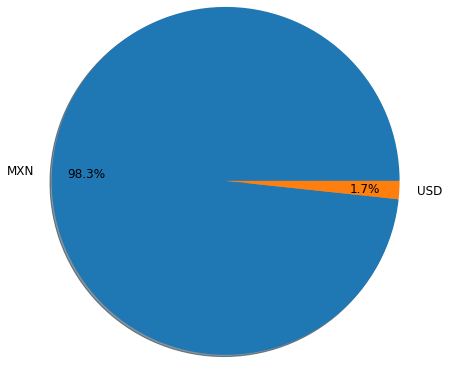

In [10]:
cuentas_moneda = df_cartera['Moneda'].value_counts()

# figura
plt.pie(cuentas_moneda, labels=cuentas_moneda.index, radius=2.0, 
        autopct='%0.1f%%',shadow=True, textprops={'fontsize': 12},pctdistance=0.8)
plt.axis=('equal')

Casi todos los contratos se realizan en MXN.

Debido a que existen variables que pueden considerarse como moneda y por lo podrían existir problemas de conversión, se eliminaran los datos que utilicen USD como moneda para los siguientes análisis. Esto no afecta al análisis general, ya que mas del 98\% de los contratos se realizan con moneda nacional.

### Contratos con comision

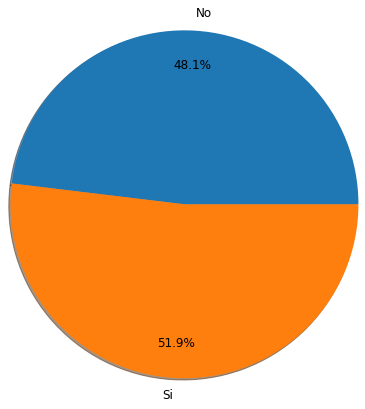

In [11]:
com_no = sum(df_cartera['Comisiones']==0)
com_si = sum(df_cartera['Comisiones']!=0)

plt.pie([com_no,com_si], labels=['No','Si'], radius=2.0, 
        autopct='%0.1f%%',shadow=True, textprops={'fontsize': 12},pctdistance=0.8)
plt.axis=('equal')

La gráfica anterior muestran los porcentajes de contratos que si ofrecen comision y los que no. Casi la mitad no tiene comision.

## Distribuciones

In [12]:
df_c_mxn = df_cartera.loc[df_cartera['Moneda']=='MXN']

### Distribucion y analisis de anomalias en plazos

Las anomalias se analian con  diagramas de cajas. Donde la linea central es la mediana, las orillas de las cajas delimitan el segundo y tercer cuartil. Mientras que los bigotes que salen de las cajas estan en la posiciones Q1-1.5\*RIC y Q3+1.5\*RIC. Donde Q1 y Q3 son los límites de los cuartiles 1 y 3 respectivamente y el RIC es el rango intercuartilico, definido como $RIC=Q3-Q1$.

Los datos fuera de los bigotes representan anomalías o datos atípicos.

El bigote inferior se encuentra en 13.0 y el bigote superior se encuentra en 56.0


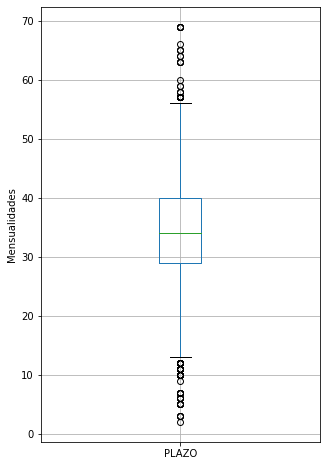

In [13]:
box_plot, dicc = df_c_mxn.boxplot(column=['PLAZO'],figsize=(5,8), return_type='both')
plt.ylabel('Mensualidades')

bigotes = [item.get_ydata()[1] for item in dicc['whiskers']]
print('El bigote inferior se encuentra en ' + str(bigotes[0]) + ' y el bigote superior se encuentra en ' + str(bigotes[1]))

In [14]:
df_menosmas = df_c_mxn.loc[(df_c_mxn['PLAZO']<bigotes[0]) | (df_c_mxn['PLAZO']>bigotes[1])]
print('Existen ' + str(df_menosmas.shape[0]) + ' datos con anomalias en el plazo')

Existen 122 datos con anomalias en el plazo


Productos de los contratos donde existen datos atípicos en el plazo


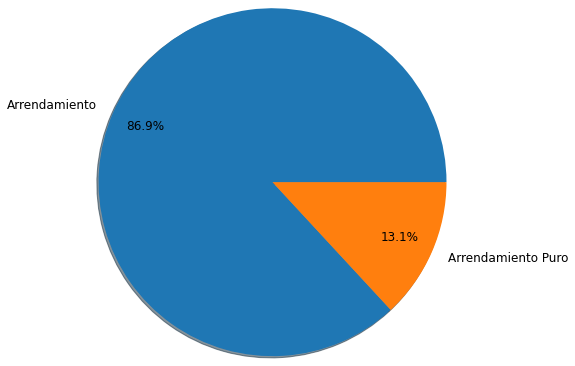

In [15]:
cuentas_p = df_menosmas['PRODUCTO'].value_counts()

print('Productos de los contratos donde existen datos atípicos en el plazo')
# figura
plt.pie(cuentas_p, labels=cuentas_p.index, radius=2.0, 
        autopct='%0.1f%%',shadow=True, textprops={'fontsize': 12},pctdistance=0.8)
plt.axis=('equal')

Finalmente realizando una relacion entre las anomalias del plazo con otras variables. Nos podemas dar cuenta que 
a pesar de que en los datos del conjunto completo existe una mayor cantidad de contratos con arrendamiento puro que de arrendamiento, en los datos atípicos del plazo, un 87\% son de arrendamiento.

Para tener una mejor idea de la distribución, se realiza un histograma.

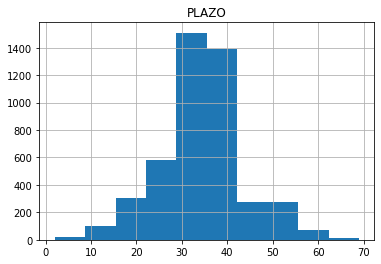

In [16]:
hist = df_c_mxn.hist(column=['PLAZO'])

En el histograma se observa que la distribución de los plazos sigue una distribución parecida a una distribución normal.

### Analisis de anomalias y distribucion en varaibles monetarias

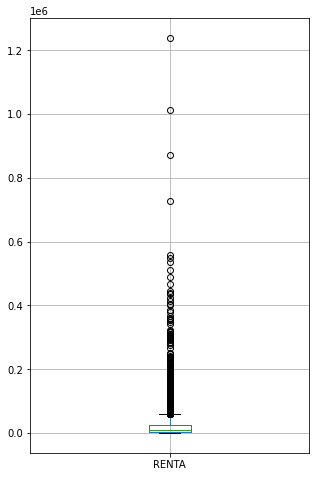

In [17]:
box_plot = df_c_mxn.boxplot(column=['RENTA'],figsize=(5,8))

Se puede notar que el diagrama de caja de la variable **Renta** no tiene una buena forma para visualizar datos y que todos los datos atípicos se encuenran en la parte superior del diagrama.

Esto nos puede decir que la distribución de nuestros datos no tiene una distribución normal. Verifiquemoslo realizando histogramas sobre las variables monetarias.

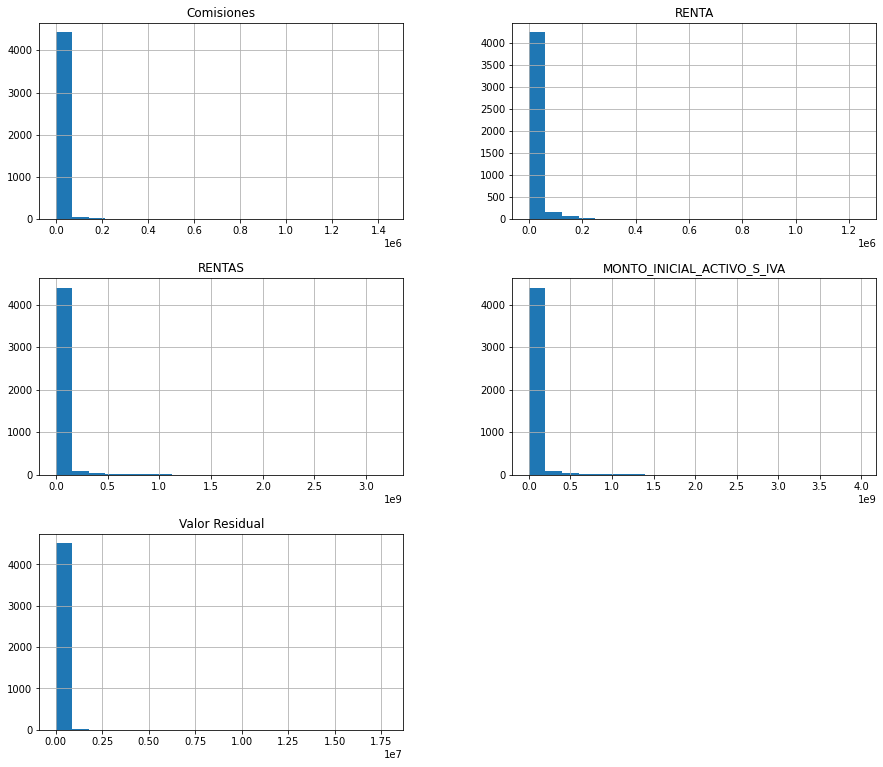

In [18]:
hist = df_c_mxn.hist(column=['Comisiones','RENTA','RENTAS','MONTO_INICIAL_ACTIVO_S_IVA','Valor Residual']
                     ,figsize=(15,13), bins =20)

Es evidente que ninguna de las variables monetarias, al contrario que la variable de plazos, sigue una distribucion normal.

### Analisis de distribución en fechas

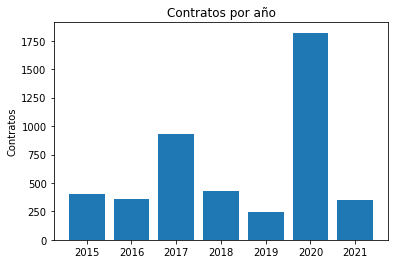

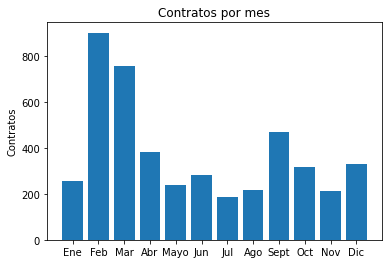

In [19]:
# Convierte las fechas a un formato de fecha
fecha_i = pd.to_datetime(df_c_mxn['FECHA INICIO'])

# Extrae los años y meses de las fechas de inicio
año = pd.DatetimeIndex(fecha_i).year
mes = pd.DatetimeIndex(fecha_i).month

(unique_year, counts_year) = np.unique(año, return_counts=True)
(unique_mes, counts_mes) = np.unique(mes, return_counts=True)
meses = ['Ene','Feb','Mar','Abr','Mayo','Jun','Jul','Ago','Sept','Oct','Nov','Dic']


plt.figure(1)
plt.bar(unique_year,counts_year)
plt.title('Contratos por año')
plt.ylabel('Contratos')

plt.figure(2)
plt.bar(meses,counts_mes)
plt.title('Contratos por mes')
plt.ylabel('Contratos')
plt.show()

En la mayoría de los años se han realizado entre 250 y 500 contratos al año. Las excepciones fueron en 2017, donde se realizaron cerca de 1000 contratos y el 2020 cuando se realizaron poco mas de 1750 contratos.

En cuanto a la distribución mensual de los contratos, se esperaría una distribución uniforme, sin emabrgo, esto no es lo que sucede. En los meses de febrero y marzo es cuando se realizan mas contratos con cerca de 800 durante los 6 años de análisis, mas del doble que en la mayoria de los meses.

## Correlaciones

### Correlaciones entre variables numéricas

En esta sección se analizan la correlacion entre las siguientes variables numericas:
- Plazo
- Comisiones
- Renta
- Rentas
- Valor residual
- Monto Inicial Activo

La correlación se realizara entre cada dos variables de las mencionadas.
Debido a que la mayoría de las variables mencionadas no sigue una distribución normal, se realizará una correlación de Spearman ya que dicho modelo no asume una distribución normal. Recordando que los vlores de la correlación van de -1 a 1. Siendo 1 una correlacion exacta, -1 una correlacion inversa (es decir mientras una variable crece, la otra decrece) y 0 sin correlación.

In [20]:
df_cartera_fin = df_c_mxn[['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']]
df_cartera_fin.head()

,PLAZO,Comisiones,RENTA,RENTAS,Valor Residual,MONTO_INICIAL_ACTIVO_S_IVA
1,31,10501.226427,7461.835424,9992864.88,85634.482759,1.235464e+07
2,41,17028.684041,6790.550000,12636154.08,81875.000000,1.474803e+07
3,33,12479.856658,10489.488623,10786315.32,86831.896552,1.279741e+07
4,32,6600.219848,6296.245401,6316047.36,52434.267241,7.215508e+06
5,29,9004.495129,5915.501186,5723917.92,52434.267241,5.987673e+06


Text(0.5, 1.0, 'Mapa de color de las correlaciones')

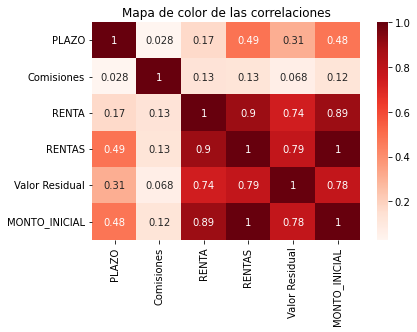

In [21]:
corr,pval = stats.spearmanr(df_cartera_fin.to_numpy())

# Grafica de colores de la matriz de correlacion
plt.figure(1)
mapa = sns.heatmap(corr,cmap='Reds',annot=True,
                   xticklabels=['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL'],
                   yticklabels=['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL'])
plt.title('Mapa de color de las correlaciones')

En la gráfica anterior, los colores mas fuertes representan las variables que tienen una gran correlación, mientras que para los mas claros no hay correlacion. Se observa que existe una correlación de prácticamente 1 entre las variables **Rentas** y **Monto inicial activo**. Para un análisis más detalllado, se realizara un gráfico de dispersión entre ambas variables.

In [22]:
MIA_np = df_c_mxn['MONTO_INICIAL_ACTIVO_S_IVA'].to_numpy().reshape(-1, 1)
# Aplica regresión lineal
lin_r = LinearRegression()
lin_r.fit(MIA_np,df_c_mxn['RENTAS'].to_numpy())

# pendiente, m
m = lin_r.coef_
# Intersección, b
b = lin_r.intercept_
# Coeficiente de determinacion
R_2 = lin_r.score(MIA_np,df_c_mxn['RENTAS'].to_numpy())

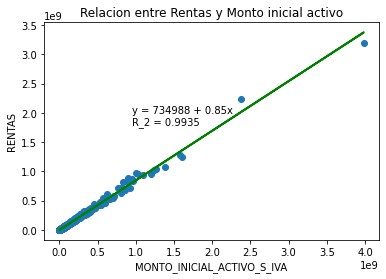

In [23]:
plt.plot(MIA_np,MIA_np*m + b,'g',linewidth='2')
plt.scatter(df_c_mxn['MONTO_INICIAL_ACTIVO_S_IVA'],df_c_mxn['RENTAS'])
plt.ylabel('RENTAS')
plt.xlabel('MONTO_INICIAL_ACTIVO_S_IVA')
plt.title('Relacion entre Rentas y Monto inicial activo')
plt.text(0.95*10**9, 2*10**9, f'y = {b:0.0f} + {m[0]:0.2f}x')
plt.text(0.95*10**9, 1.8*10**9,  f'R_2 = {R_2:0.4f}')
plt.show()

En la gráfica se observa la relación lineal que existe entre ambas variables. Se añadió la ecuación lineal que las relaciona y el valor del coeficiente de determinación, que nos ayuda a analizar el rendimiento el modelo. Un valor cercano a 1 nos indica un buen rendimiento del modelo.

Este analisis nos indica que ambas variables van practicamente de la mano y una influye de manera determinante en la otra.

### Correlacion entre variables numericas y categoricas

En esta sección se analiza la correlación entre 3 variables categóricas: **producto**, **cliente** y **region**. Con las 6 variables numericas de la sección anterior.

Para esto se dividira el conjunto de datos en cada categoría y se obtendrá le mediana de cada grupo dividido (se eligió la mediana debido a la distribución que tienen las variables numericas) y se realizará una gráfica de barras para analizar el comportamiento de las medianas.

Para la variable producto se eligieron las dos categorías para la división, estas son arrendamiento y arrendamiento puro.

Para la variable cliente se eligieron los 3 clientes que mas realizan contratos (como vimos en la primera sección estos hacen el 50\% de los contratos) y el resto de los clientes se dejó en la categoría de otros.

Para la variable región se eligieron las 3 regiones donde hay mas contratos, es decir CDMX, Quintana Roo y Nuevo León, y el resto de las regiones se dejó en la categoría de otros.

Los resultados se presentan a continuación.

In [24]:
d_arr = df_c_mxn.loc[df_c_mxn['PRODUCTO']=='Arrendamiento',
                     ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
d_arrp = df_c_mxn.loc[df_c_mxn['PRODUCTO']=='Arrendamiento Puro',
                      ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
df_prod = pd.DataFrame({'Arr': d_arr, 'Arr P': d_arrp},
                       index=d_arr.index)


d_169 = df_c_mxn.loc[df_c_mxn['ID_CLIENTE']==169,
                     ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
d_175 = df_c_mxn.loc[df_c_mxn['ID_CLIENTE']==175,
                     ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
d_156 = df_c_mxn.loc[df_c_mxn['ID_CLIENTE']==156,
                     ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
d_res = df_c_mxn.loc[(df_c_mxn['ID_CLIENTE']!=169) & (df_c_mxn['ID_CLIENTE']!=175) & (df_c_mxn['ID_CLIENTE']!=156),
                     ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
df_cliente = pd.DataFrame({'169': d_169, '175': d_175, '156': d_156, 'Otros': d_res},
                          index=d_169.index)


d_cdmx = df_c_mxn.loc[df_c_mxn['Region']=='CDMX',
                      ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
d_qr = df_c_mxn.loc[df_c_mxn['Region']=='QUINTANA ROO',
                    ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
d_nl = df_c_mxn.loc[df_c_mxn['Region']=='NUEVO LEON',
                    ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
d_rest = df_c_mxn.loc[(df_c_mxn['Region']!='CDMX') & (df_c_mxn['Region']!='QUINTANA ROO') & (df_c_mxn['Region']!='NUEVO LEON'),
                      ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']].median()
df_region = pd.DataFrame({'CDMX': d_cdmx, 'QR': d_qr, 'NL': d_nl, 'Otros': d_rest},
                         index=d_cdmx.index)

columnas = ['PLAZO','Comisiones','RENTA','RENTAS','Valor Residual','MONTO_INICIAL_ACTIVO_S_IVA']

***Variable: producto***

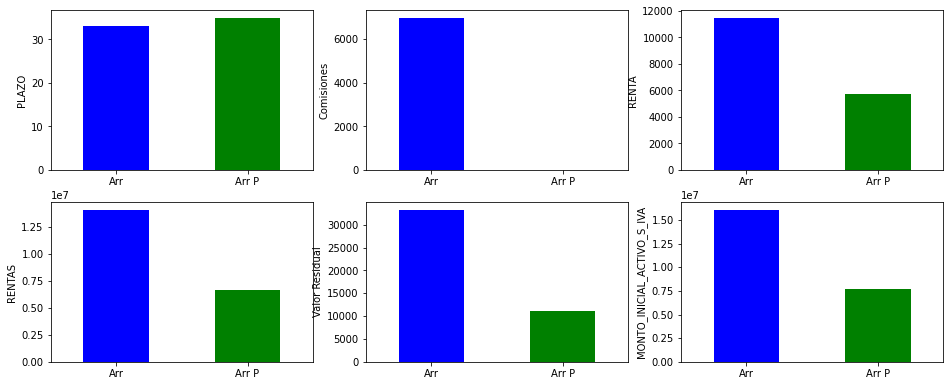

In [25]:
indice = 1

plt.figure
for columna in columnas:
    plt.subplot(3,3,indice)
    barra = df_prod.loc[columna].plot.bar(rot=0,color = {'blue', 'green'},figsize=(16,10))
    plt.ylabel(columna)
    indice +=1

Datos destacables:
- La categoría arrendamiento tiene una mediana de mas del doble que el arrendamiento puro en todas las variables monetarias.
- Ambas categorías tienen medianas parecidas en la variable plazo
- La gran mayoria de los contratos en arrendamiento puro no tienen comisiones

***Variable: Cliente***

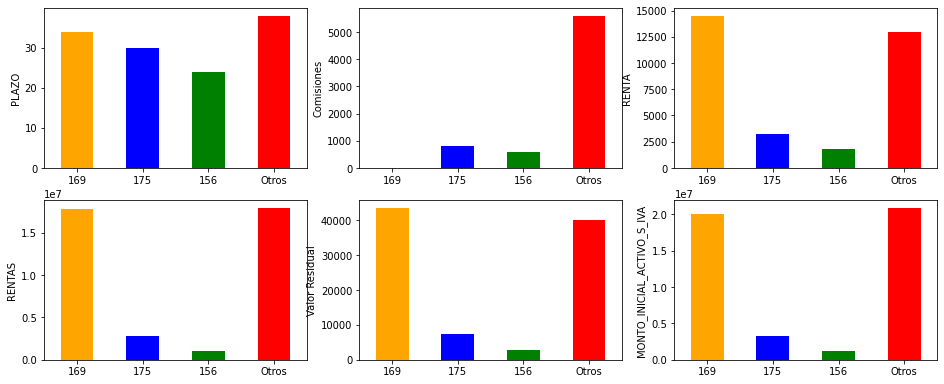

In [26]:
indice = 1

plt.figure
for columna in columnas:
    plt.subplot(3,3,indice)
    barra = df_cliente.loc[columna].plot.bar(rot=0,color = {'blue', 'green', 'red', 'orange'},figsize=(16,10))
    plt.ylabel(columna)
    indice +=1

Datos destacables:
- La gran mayoria de los contratos con el cliente principal no tienen comisiones
- El segundo y tercer cliente principal tienen medianas muy bajs en todas las variables monetarias, comparados con el cliente principal, en todas las variables monetarias, excepto en comisiones
- El cliente principal tiene una mediana coparable con el resto de los clientes en casi todas las categorias por lo que no hay mucha diferencia entre los contratos con el cliente principal y con el resto de los clientes

***Variable: Región***

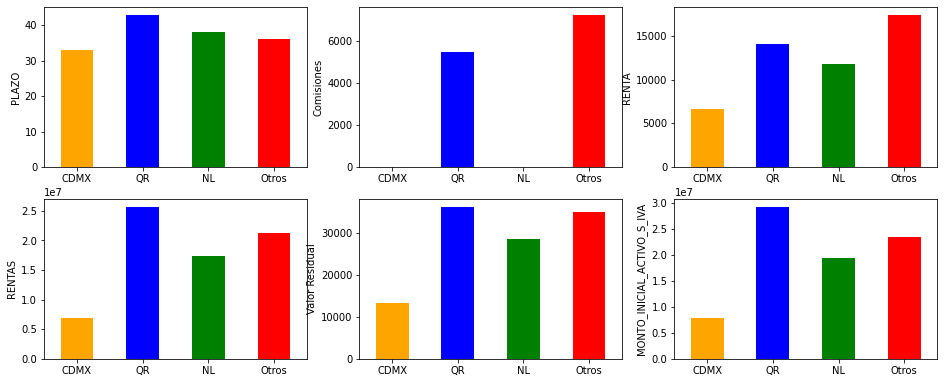

In [27]:
indice = 1

plt.figure
for columna in columnas:
    plt.subplot(3,3,indice)
    barra = df_region.loc[columna].plot.bar(rot=0,color = {'blue', 'green', 'red', 'orange'},figsize=(16,10))
    plt.ylabel(columna)
    indice +=1

Datos destacables:
- La gran mayoría de los contratos con la CDMX y Nuevo Leon no ofrecen comisiones
- La mediana de los plazos es muy parecida en todas las regiones
- La CDMX tiene una mediana muy baja en todas las variables monetarias comparadas con el resto de las regiones
- Quintana Roo tiene las medianas más altas en todas las variables monetarias, respecto a las otras regiones importantes

## Resumen del análsis exploratorio

- Las variables **periodicidad**, **tabla amortizacion**, **contrato** y **tipo de reestructura** no nos brindan informacion para el análisis
- Mas del 98\% de los contratos están en moneda nacional
- La CDMX abarca casi 3 de cada 4 contratos realizados, sin embargo el resto de las regiones tienen valores mayores en variables monetarias por contrato
- Se han hecho contratos con 383 clientes, pero solo entre 3 clientes se abarca el 50\% de los contratos
- Casi la mitad de los contratos no ofrecen comisiones
- En el año 2017 se realizaron mas del doble de contratos que el resto de los años (excepto en el 2020). Minetras que en el 2020 se realizaron mas del triple
- Los meses en los que se realizaron mas contratos fueron en Febrero y Marzo
- La variables **Rentas** y **Monto Inicial Activos** tienen una dependencia lineal entre si. 
- Los contratos por arrendamiento tienen una mediana de mas del doble que los de arrendamiento puro en todas las variables monetarias.
- El cliente principal tiene una mediana coparable con el resto de los clientes en casi todas las categorias por lo que no hay mucha diferencia entre los contratos con el cliente principal y con el resto de los clientes